In [3]:
import pandas as pd
import numpy as np
import csv
from Levenshtein import distance

# whole data

In [4]:
file = pd.read_csv('raw.csv')

In [5]:
file = file[['CDR3_beta','Amino Acids']]


In [6]:
file

,CDR3_beta,Amino Acids
0,CASSAQGTGDRGYTF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
1,CASSQGGRLNTEAFF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
2,CASSKGTVSGLSG,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
3,CASSPSQREGSEQYF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
4,CASSLWKSGQGGVETQYF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
...,...,...
133882,CASSKRDSQETQYF,"AQVDVVNFNL,NYIAQVDVV"
133883,CASSEIDRAEQYF,"AQVDVVNFNL,NYIAQVDVV"
133884,CASSPGDNEQFF,"AQVDVVNFNL,NYIAQVDVV"
133885,CASSPRLVSYNEQFF,"AQVDVVNFNL,NYIAQVDVV"


In [7]:
file = file.drop_duplicates()

In [8]:
file = file.drop(file[file.CDR3_beta.str.contains(r'[@#&$%+-/*X]')].index)

In [9]:
file

,CDR3_beta,Amino Acids
0,CASSAQGTGDRGYTF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
1,CASSQGGRLNTEAFF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
2,CASSKGTVSGLSG,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
3,CASSPSQREGSEQYF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
4,CASSLWKSGQGGVETQYF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
...,...,...
133882,CASSKRDSQETQYF,"AQVDVVNFNL,NYIAQVDVV"
133883,CASSEIDRAEQYF,"AQVDVVNFNL,NYIAQVDVV"
133884,CASSPGDNEQFF,"AQVDVVNFNL,NYIAQVDVV"
133885,CASSPRLVSYNEQFF,"AQVDVVNFNL,NYIAQVDVV"


In [10]:
file_new = file.drop_duplicates(subset='CDR3_beta', keep=False)

In [11]:
file_new

,CDR3_beta,Amino Acids
0,CASSAQGTGDRGYTF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
1,CASSQGGRLNTEAFF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
2,CASSKGTVSGLSG,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
3,CASSPSQREGSEQYF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
4,CASSLWKSGQGGVETQYF,"ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK"
...,...,...
133882,CASSKRDSQETQYF,"AQVDVVNFNL,NYIAQVDVV"
133883,CASSEIDRAEQYF,"AQVDVVNFNL,NYIAQVDVV"
133884,CASSPGDNEQFF,"AQVDVVNFNL,NYIAQVDVV"
133885,CASSPRLVSYNEQFF,"AQVDVVNFNL,NYIAQVDVV"


In [12]:
file_data = np.array(file_new) #np.ndarray()
file_list=file_data.tolist() #list

In [13]:
file_list

[['CASSAQGTGDRGYTF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSQGGRLNTEAFF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSKGTVSGLSG', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSPSQREGSEQYF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSLWKSGQGGVETQYF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSTTGLAGPYEQYF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSFIASGRGGVYEQYF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSQDRTTGFEQYF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSEGVYEQYF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CAWVPPQGSGFF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSVLPSGSTDTQYF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASRTGGTSYGYTF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSTIPLAGVPGSYNEQFF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CSVERRNEQFF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CAISESDSYNEQFF', 'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK'],
 ['CASSLDGLTRSSYNSPLHF', '

In [14]:
dic_raw = {}
for i in file_list:
    key = i[1]
    value = i[0]
    #print(key)
    #print(value)
    if key not in dic_raw.keys():
        dic_raw[key] = [value]
    else:
        dic_raw[key].append(value)

In [15]:
ls_raw=[]
i=0
for k,v in dic_raw.items():   
    ls_raw.append([k, len(list(filter(None, v)))])
    #print(ls)
    if i < len(dic_raw)-1:
        i=i+1
    else:
        break

In [16]:
ls_raw.sort(key = lambda x: x[1], reverse = True) 

In [17]:
ls_raw

[['AFLLFLVLI,FLAFLLFLV,FYLCFLAFL,FYLCFLAFLL,IDFYLCFLAF,IELSLIDFYL,LIDFYLCFL,LLFLVLIML,MIELSLIDFY,SLIDFYLCFL,YLCFLAFLL',
  15287],
 ['HTTDPSFLGRY', 6931],
 ['FVDGVPFVV', 4859],
 ['FLWLLWPVT,FLWLLWPVTL,LWLLWPVTL,LWPVTLACF,TLACFVLAAV,WLLWPVTLA,WPVTLACFVL',
  4678],
 ['AFPFTIYSL,GYINVFAFPF,INVFAFPFTI,MGYINVFAF,NVFAFPFTI,NVFAFPFTIY,YINVFAFPF',
  4359],
 ['KLSYGIATV', 4340],
 ['FLNGSCGSV', 3887],
 ['SEHDYQIGGYTEKW,YQIGGYTEK,YQIGGYTEKW', 3314],
 ['APKEIIFL,KEIIFLEGETL', 2294],
 ['FLQSINFVR,FLQSINFVRI,FLYLYALVYF,GLEAPFLYLY,INFVRIIMR,LQSINFVRI,LQSINFVRII,QSINFVRII,SINFVRIIMR,VYFLQSINF,VYFLQSINFV,YFLQSINFVR,YLYALVYFL',
  2229],
 ['ELYSPIFLI,LYSPIFLIV,QELYSPIFL,VQELYSPIF,VQELYSPIFL', 2052],
 ['LSPRWYFYY,SPRWYFYYL', 1894],
 ['GMEVTPSGTWL,MEVTPSGTWL,TPSGTWLTY,VTPSGTWLTY', 1824],
 ['LLDDFVEII,LLLDDFVEI', 1765],
 ['AEAELAKNVSL,AELAKNVSLDNVL', 1752],
 ['DFLEYHDVR,EDFLEYHDVR,LEYHDVRVV,LEYHDVRVVL,YEDFLEYHDVRVVL', 1652],
 ['QYIKWPWYI,YEQYIKWPW,YEQYIKWPWY', 1573],
 ['SELVIGAVI,SELVIGAVIL', 1477],
 ['FLPRV

In [18]:
def smallmatrix(lis1,lis2):
    List1 = lis1
    List2 = lis2

    smallMatrix = np.zeros((len(List1),len(List2)),dtype=np.int)

    for i in range(0,len(List1)):
        for j in range(0,len(List2)):
            smallMatrix[i,j] = distance(List1[i],List2[j])
    
    #ave = np.mean(smallMatrix)
    #return np.round(ave,4)
    return smallMatrix


In [19]:
pep1 = smallmatrix(dic_raw['LSPRWYFYY,SPRWYFYYL'],dic_raw['LSPRWYFYY,SPRWYFYYL'])

In [20]:
pep1

array([[ 0, 10,  7, ...,  3,  8,  7],
       [10,  0,  9, ..., 10,  9, 10],
       [ 7,  9,  0, ...,  7,  8,  9],
       ...,
       [ 3, 10,  7, ...,  0,  8,  7],
       [ 8,  9,  8, ...,  8,  0,  8],
       [ 7, 10,  9, ...,  7,  8,  0]])

In [21]:
pep3 = smallmatrix(dic_raw['KLSYGIATV'],dic_raw['KLSYGIATV'])

In [22]:
pep3.shape

(4340, 4340)

In [23]:
pep4 = smallmatrix(dic_raw['KLSYGIATV'],dic_raw['FLNGSCGSV'])

In [24]:
pep4.shape

(4340, 3887)

In [25]:
pep2 = smallmatrix(dic_raw['LSPRWYFYY,SPRWYFYYL'],dic_raw['GMEVTPSGTWL,MEVTPSGTWL,TPSGTWLTY,VTPSGTWLTY'])

In [26]:
pep2.shape

(1894, 1824)

In [27]:
def get_all_distance(matrix):
    float_arr=matrix.astype(np.float64)
    np.fill_diagonal(float_arr,np.inf)
    diff_dis = []
    #print(float_arr)
    for i in float_arr:
        for j in i:
            if j==np.inf:
                continue
            else:
                diff_dis.append(j)
   
    return diff_dis

In [28]:
def diff_distance(matrix):
    ls=[]
    for i in matrix:
        #print(i)
        for j in i:
            ls.append(j)
    return ls

In [29]:
pep1_d = get_all_distance(pep1)

In [30]:
pep2_d = diff_distance(pep2)

In [31]:
pep3_d = get_all_distance(pep3)

In [32]:
pep4_d = diff_distance(pep4)

In [33]:
len(pep3_d)

18831260

In [34]:
len(pep4_d)

16869580

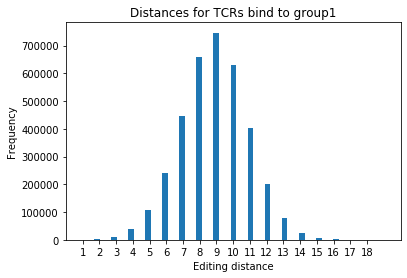

In [36]:
import matplotlib.pyplot as plt
x = range(1,19,1)
plt.xlim(0,20)
plt.xticks(x)
plt.hist(pep1_d,bins=50)
plt.xlabel('Editing distance')
plt.ylabel('Frequency')
plt.title('Distances for TCRs bind to group1')
plt.show()

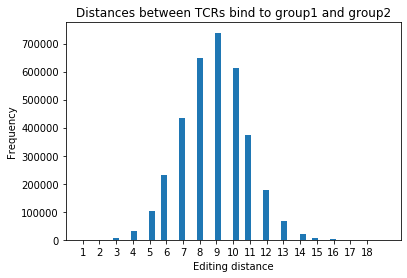

In [37]:
x = range(1,19,1)
plt.xlim(0,20)
plt.xticks(x)
plt.hist(pep2_d,bins=50)
plt.xlabel('Editing distance')
plt.ylabel('Frequency')
plt.title('Distances between TCRs bind to group1 and group2')
plt.show()

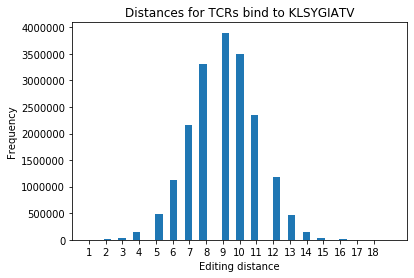

In [38]:
import matplotlib.pyplot as plt
x = range(1,19,1)
plt.xlim(0,20)
plt.xticks(x)
plt.hist(pep3_d,bins=50)
plt.xlabel('Editing distance')
plt.ylabel('Frequency')
plt.title('Distances for TCRs bind to KLSYGIATV')
plt.show()

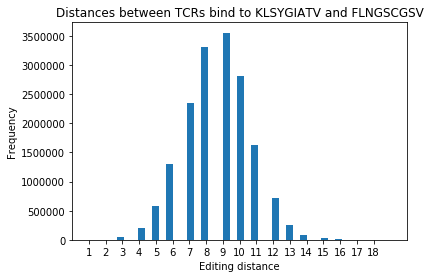

In [39]:
import matplotlib.pyplot as plt
x = range(1,19,1)
plt.xlim(0,20)
plt.xticks(x)
plt.hist(pep4_d,bins=50)
plt.xlabel('Editing distance')
plt.ylabel('Frequency')
plt.title('Distances between TCRs bind to KLSYGIATV and FLNGSCGSV')
plt.show()

In [40]:
def min_same_dis2(matrix):
    float_arr=matrix.astype(np.float64)
    np.fill_diagonal(float_arr,np.inf)
    mindist = []
    #print(float_arr)
    for i in range(len(float_arr[0])):
        mindist.append(int(min(float_arr[i])))
        #print(mindist)
    return mindist

In [41]:
def min_diff_dis(matrix):
    min_dis=[]
    for i in matrix:
        #print(i)
        min_dis.append(min(i))
    return min_dis

In [42]:
pep1_min = min_same_dis2(pep1)

In [43]:
pep2_min = min_diff_dis(pep2)

In [44]:
pep3_min = min_same_dis2(pep3)

In [45]:
pep4_min = min_diff_dis(pep4)

In [46]:
len(pep1_min)

1894

In [47]:
len(pep2_min)

1894

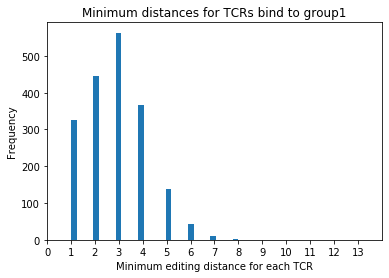

In [48]:
x = range(0,14,1)
plt.xlim(0,14)
plt.xticks(x)
plt.xlabel('Minimum editing distance for each TCR')
plt.ylabel('Frequency')
plt.hist(pep1_min,bins=30)
plt.title('Minimum distances for TCRs bind to group1')
plt.show()

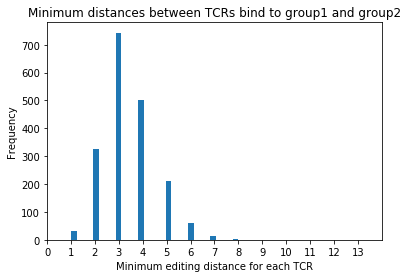

In [49]:
x = range(0,14,1)
plt.xlim(0,14)
plt.xticks(x)
plt.hist(pep2_min,bins=30)
plt.xlabel('Minimum editing distance for each TCR')
plt.ylabel('Frequency')
plt.title('Minimum distances between TCRs bind to group1 and group2')
plt.show()

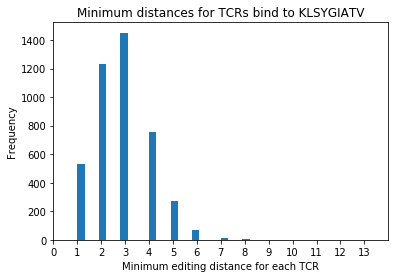

In [50]:
x = range(0,14,1)
plt.xlim(0,14)
plt.xticks(x)
plt.xlabel('Minimum editing distance for each TCR')
plt.ylabel('Frequency')
plt.hist(pep3_min,bins=30)
plt.title('Minimum distances for TCRs bind to KLSYGIATV')
plt.show()

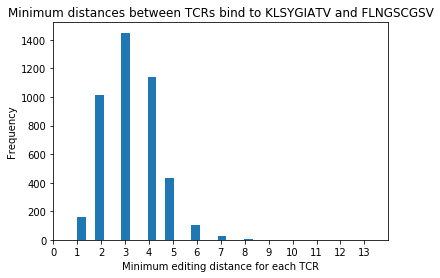

In [51]:
x = range(0,14,1)
plt.xlim(0,14)
plt.xticks(x)
plt.hist(pep4_min,bins=30)
plt.xlabel('Minimum editing distance for each TCR')
plt.ylabel('Frequency')
plt.title('Minimum distances between TCRs bind to KLSYGIATV and FLNGSCGSV')
plt.show()

# KNN

In [52]:
dic_raw

{'ADAGFIKQY,AELEGIQY,LADAGFIKQY,TLADAGFIK': ['CASSAQGTGDRGYTF',
  'CASSQGGRLNTEAFF',
  'CASSKGTVSGLSG',
  'CASSPSQREGSEQYF',
  'CASSLWKSGQGGVETQYF',
  'CASSTTGLAGPYEQYF',
  'CASSFIASGRGGVYEQYF',
  'CASSQDRTTGFEQYF',
  'CASSEGVYEQYF',
  'CAWVPPQGSGFF',
  'CASSVLPSGSTDTQYF',
  'CASRTGGTSYGYTF',
  'CASSTIPLAGVPGSYNEQFF',
  'CSVERRNEQFF',
  'CAISESDSYNEQFF',
  'CASSLDGLTRSSYNSPLHF',
  'CASSLAGRQPQHF',
  'CASSHTRGVPEAFF',
  'CASSRLEMGQGNSNVAKNIQYF',
  'CASRFDTGLNEQFF',
  'CSVVYAGASQRRTYNEQFF',
  'CASSLRGRLNTEAFF',
  'CASSLWFSGGGGTDTQYF',
  'CASSFRTVSSYEQYF',
  'CASSLWTSGRGGTDTQYF',
  'CASSYSSGQWDEQFF',
  'CASSQYIGYNEQFF',
  'CASSFRQRPYEQYF',
  'CASSFRVAGDRGFGTQYF',
  'CASSLREYRRETQYF',
  'CASSRPDGADEQYF',
  'CASSFVGANNEQYF',
  'CASSSAGTAQETQYF',
  'CASSIRRLAGDADTQYF',
  'CASSHVFRQGEDTEAFF',
  'CASSSSFGGRNTGELFF',
  'CASSSWGSGRGGPTDTQYF',
  'CASSRTPRQDTDTQYF',
  'CASSSWTSGRGGTDADTQYF',
  'CASSLLAWEGTDTQYF',
  'CASSHLAGDGETQYF',
  'CASSQGRITGYEQYF',
  'CASTPGLAGAYEQFF',
  'CASSSWASGRGGQETQYF'

In [53]:
ls_raw

[['AFLLFLVLI,FLAFLLFLV,FYLCFLAFL,FYLCFLAFLL,IDFYLCFLAF,IELSLIDFYL,LIDFYLCFL,LLFLVLIML,MIELSLIDFY,SLIDFYLCFL,YLCFLAFLL',
  15287],
 ['HTTDPSFLGRY', 6931],
 ['FVDGVPFVV', 4859],
 ['FLWLLWPVT,FLWLLWPVTL,LWLLWPVTL,LWPVTLACF,TLACFVLAAV,WLLWPVTLA,WPVTLACFVL',
  4678],
 ['AFPFTIYSL,GYINVFAFPF,INVFAFPFTI,MGYINVFAF,NVFAFPFTI,NVFAFPFTIY,YINVFAFPF',
  4359],
 ['KLSYGIATV', 4340],
 ['FLNGSCGSV', 3887],
 ['SEHDYQIGGYTEKW,YQIGGYTEK,YQIGGYTEKW', 3314],
 ['APKEIIFL,KEIIFLEGETL', 2294],
 ['FLQSINFVR,FLQSINFVRI,FLYLYALVYF,GLEAPFLYLY,INFVRIIMR,LQSINFVRI,LQSINFVRII,QSINFVRII,SINFVRIIMR,VYFLQSINF,VYFLQSINFV,YFLQSINFVR,YLYALVYFL',
  2229],
 ['ELYSPIFLI,LYSPIFLIV,QELYSPIFL,VQELYSPIF,VQELYSPIFL', 2052],
 ['LSPRWYFYY,SPRWYFYYL', 1894],
 ['GMEVTPSGTWL,MEVTPSGTWL,TPSGTWLTY,VTPSGTWLTY', 1824],
 ['LLDDFVEII,LLLDDFVEI', 1765],
 ['AEAELAKNVSL,AELAKNVSLDNVL', 1752],
 ['DFLEYHDVR,EDFLEYHDVR,LEYHDVRVV,LEYHDVRVVL,YEDFLEYHDVRVVL', 1652],
 ['QYIKWPWYI,YEQYIKWPW,YEQYIKWPWY', 1573],
 ['SELVIGAVI,SELVIGAVIL', 1477],
 ['FLPRV

In [54]:
len(ls_raw)

268

In [55]:
tcr1 = dic_raw['KLSYGIATV']

In [56]:
tcr2 = dic_raw['FLNGSCGSV']

In [57]:
tcr3 = dic_raw['FLWLLWPVT,FLWLLWPVTL,LWLLWPVTL,LWPVTLACF,TLACFVLAAV,WLLWPVTLA,WPVTLACFVL']

In [58]:
tcr4 = dic_raw['FVDGVPFVV']

In [59]:
tcr5 = dic_raw['AFPFTIYSL,GYINVFAFPF,INVFAFPFTI,MGYINVFAF,NVFAFPFTI,NVFAFPFTIY,YINVFAFPF']

In [60]:
tcr6 = dic_raw['SEHDYQIGGYTEKW,YQIGGYTEK,YQIGGYTEKW']

In [61]:
ls1=[]
for i in tcr1:
    ls1.append([i,[1,0,0,0,0,0]])

In [62]:
ls2=[]
for j in tcr2:
    ls2.append([j,[0,1,0,0,0,0]])

In [63]:
ls3=[]
for ii in tcr3:
    ls3.append([ii,[0,0,1,0,0,0]])

In [64]:
ls4=[]
for jj in tcr4:
    ls4.append([jj,[0,0,0,1,0,0]])

In [65]:
ls5=[]
for z in tcr5:
    ls5.append([z,[0,0,0,0,1,0]])

In [66]:
ls6=[]
for zz in tcr6:
    ls6.append([zz,[0,0,0,0,0,1]])

In [67]:
allls = ls1+ls2+ls3+ls4+ls5+ls6

In [68]:
import random
random.shuffle(allls)

In [70]:
len(allls)

25437

In [71]:
25437*0.8

20349.600000000002

In [72]:
train_data = allls[0:20350]

In [73]:
test_data = allls[20351:]

In [74]:
test_data[0]

['CASSYGGEQYF', [0, 0, 0, 1, 0, 0]]

In [75]:
from Levenshtein import distance
def edit_distance(seq1,seq2):
    return distance(seq1,seq2)
    

In [76]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = edit_distance(test_row[0], train_row[0])
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i])
    return neighbors

In [77]:
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[0][-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [78]:
def predict_probability(train,test_row,num_neighbors):
    neighbors = get_neighbors(train,test_row,num_neighbors)
    add=[0,0,0,0,0,0]
    s=0
    prob=[]
    for ele in neighbors:
        add = add+(1/ele[1])*np.array(ele[0][-1])

        
    for a in add:
        s=s+a
    
    for ss in add:
        prob.append(ss/s*1)
    #print(prob)
        
    return prob

In [79]:
len(train_data)

20350

In [80]:
len(test_data)

5086

In [81]:
pred_prob=[]
for row in test_data:
    output = predict_probability(train_data, row, 7)
    pred_prob.append(output)



In [82]:
truelabel=[]
for t in test_data:
    truelabel.append(t[1])

In [83]:
truelabel_new=[]
for label in truelabel:
    for index in range(len(label)):
        if label[index]==1:
            truelabel_new.append(int(index))
        

In [86]:
pred_prob_new=np.array(pred_prob)

In [87]:
pred_prob


[[0.0, 0.2857142857142857, 0.0, 0.2857142857142857, 0.42857142857142855, 0.0],
 [0.0, 0.375, 0.125, 0.375, 0.125, 0.0],
 [0.0, 0.7600000000000001, 0.0, 0.0, 0.24000000000000005, 0.0],
 [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.2857142857142857,
  0.14285714285714285,
  0.14285714285714285],
 [0.0, 0.0, 0.0, 0.0, 0.13333333333333333, 0.8666666666666666],
 [0.13333333333333336, 0.0, 0.13333333333333336, 0.0, 0.7333333333333334, 0.0],
 [0.0, 0.7368421052631579, 0.0, 0.0, 0.26315789473684204, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.27272727272727276,
  0.36363636363636365,
  0.09090909090909091,
  0.0,
  0.27272727272727276,
  0.0],
 [0.0, 0.0, 0.2857142857142857, 0.2857142857142857, 0.42857142857142855, 0.0],
 [0.0, 0.14285714285714285, 0.0, 0.0, 0.8571428571428571, 0.0],
 [0.0, 0.625, 0.125, 0.0, 0.125, 0.125],
 [0.1176470588235294,
  0.0,
  0.2941176470588235,
  0.4705882352941176,
  0.1176470588235294,
  0.0],
 [0.6000000000000001, 0.0, 0.0, 0.0, 0.4, 0

In [88]:
len(pred_prob_new)

5086

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr = {}
tpr = {}
thresh ={}
auc_score={}
for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(truelabel_new, pred_prob_new[:,i],pos_label=i)
    auc_score[i] = auc(fpr[i], tpr[i])

Text(0, 0.5, 'True Positive rate')

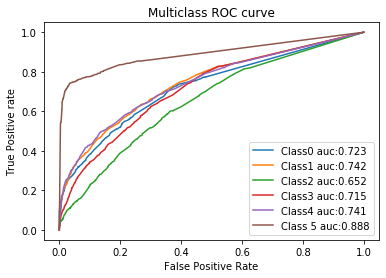

In [90]:
import matplotlib.pyplot as plt
plt.plot(fpr[0], tpr[0],label='Class0 auc:{0:.3f}'.format(auc_score[0]))
plt.plot(fpr[1], tpr[1], label='Class1 auc:{0:.3f}'.format(auc_score[1]))
plt.plot(fpr[2], tpr[2],label='Class2 auc:{0:.3f}'.format(auc_score[2]))
plt.plot(fpr[3], tpr[3],label='Class3 auc:{0:.3f}'.format(auc_score[3]))
plt.plot(fpr[4], tpr[4],label='Class4 auc:{0:.3f}'.format(auc_score[4]))
plt.plot(fpr[5], tpr[5],label='Class 5 auc:{0:.3f}'.format(auc_score[5]))
plt.legend(loc='best')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')